In [1]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

StatementMeta(Hackathon, 4, 1, Finished, Available)

     |████████████████████████████████| 287 kB 32.0 MB/s eta 0:00:01
     |████████████████████████████████| 110 kB 79.2 MB/s eta 0:00:01


[nltk_data] Downloading package stopwords to /home/trusted-service-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/trusted-service-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/trusted-service-
[nltk_data]     user/nltk_data...


### **Reading the data.**

In [2]:
#df = pd.read_excel("Azure_Reviews.xlsx")
df = pd.read_excel("abfss://buffermgmt@buffermgmtstoragedev.dfs.core.windows.net/transformdata/hackathon/Reviews_DataSet.xlsx")

StatementMeta(Hackathon, 4, 2, Finished, Available)

In [3]:
print(df.shape)
df.head(5)

StatementMeta(Hackathon, 4, 3, Finished, Available)

(68, 2)


,Reviews,Sentiment
0,"Overall Comment:""Microsoft Azure is the seamle...",Positive
1,Azure is perfectly fitted for our organization...,Positive
2,"no not at all, I like Microsoft Azure with all...",Positive
3,The user interface for Microsoft products is e...,Positive
4,"Microsoft Azure has 54 regions worldwide, with...",Negative


### Data Preprocessing and Cleansing
- Removing special characters ,spaces & Numbers etc.
- Removing stop words which are frequenctly repeated words in text like - A, To, The..
- Lemmatization : Reduce inflectional words to their base form.
- Since ML Models dont work directly on Text ,We are doing feature represtation to convert text into frequency of words.

In [4]:
df.isnull().sum(axis=0)                                # Check for NULL values.
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)
df.head()                                 # Check first 5 rows of data

StatementMeta(Hackathon, 4, 4, Finished, Available)

,Reviews,Sentiment
0,"Overall Comment:""Microsoft Azure is the seamless public cloud platform that is most important for our overall cloud infrastructure and web applications. This cloud platform provides many features related to Big data, SQL, virtual machines, AI/ML, and many more and I must admit these all are super easy to use and very much effective. Azure provides free accounts to the new users and also provides some free credits to test this platform out and according to me, this is really an innovative approach. Azure deployment and integration are really easy, unlike the others. The support team helps us throughout the deployment and integration process and on the other hand, the maintenance of this cloud platform is also cost-effective. The pricing of this cloud platform is also attractive, they provide a pay-as-you-go feature as well as an enterprise discount option as well. using the pay-as-you-go, I can save my cloud cost as in this I need to pay for the usage only and don't need to commit to them in terms of volume and on the other hand for the higher discount I can choose the Enterprise discount option which provides more flexibility and savings. There is also an option for additional savings plans as well. The console of this platform is really great and user-friendly, using the console I can purchase the Azure services and be able to shut down the services as well whenever I want. Console provide me full information and report related to my usages and I can also create multiple Azure accounts and able to add them in an admin account. this is really simple with the Azure Console. hence my overall experience using Azure is great.""",Positive
1,"Azure is perfectly fitted for our organization and for our needs, this is not creating any issue so far and we are really very happy with the overall output from this platform, hence at this time I have nothing to say related to the demerits of this platform.",Positive
2,"no not at all, I like Microsoft Azure with all updates, it is the best cloud vendor I use ever in my life",Positive
3,"The user interface for Microsoft products is extremely user-friendly. If we get stuck on a critical issue, they help us out and fix it quickly. When you read the legal agreement that covers Azure's services, you'll notice that the uptime guarantee you're offered is 99.95 percent. Over the course of a year, that translates to around 4.5 hours of downtime in real-time hours. For the same price as Azure, comparable services from competing brands offer uptime percentages of 98 percent, 95 percent, and occasionally as low as 90 percent.",Positive
4,"Microsoft Azure has 54 regions worldwide, with availability in 140 countries when all announced regions are included. You're all set if you live in the United States, Europe, Australia, India, Japan, or China. Your company can benefit from quick data access. However, if you live in South America, you will only have access to one region, which is known as ""Brazil South."" Africa has two announced regions, but none are operational as of yet. Canada has only two regions, both of which are located in the country's east. If there isn't a nearby region, speed becomes an issue.",Negative


In [5]:
review_df = df[df['Sentiment'] != 'Neutral']
print(review_df.shape)
review_df.head(5)
review_df["Sentiment"].value_counts()

StatementMeta(Hackathon, 4, 5, Finished, Available)

(65, 2)


Negative    33
Positive    32
Name: Sentiment, dtype: int64

### Text Beautification to remove HTML tags.

In [6]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

review_df['Reviews'] = review_df['Reviews'].apply(lambda x: strip_html(x))
review_df.head()

StatementMeta(Hackathon, 4, 6, Finished, Available)

<ipython-input-6-3bd87395>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['Reviews'] = review_df['Reviews'].apply(lambda x: strip_html(x))


,Reviews,Sentiment
0,"Overall Comment:""Microsoft Azure is the seamless public cloud platform that is most important for our overall cloud infrastructure and web applications. This cloud platform provides many features related to Big data, SQL, virtual machines, AI/ML, and many more and I must admit these all are super easy to use and very much effective. Azure provides free accounts to the new users and also provides some free credits to test this platform out and according to me, this is really an innovative approach. Azure deployment and integration are really easy, unlike the others. The support team helps us throughout the deployment and integration process and on the other hand, the maintenance of this cloud platform is also cost-effective. The pricing of this cloud platform is also attractive, they provide a pay-as-you-go feature as well as an enterprise discount option as well. using the pay-as-you-go, I can save my cloud cost as in this I need to pay for the usage only and don't need to commit to them in terms of volume and on the other hand for the higher discount I can choose the Enterprise discount option which provides more flexibility and savings. There is also an option for additional savings plans as well. The console of this platform is really great and user-friendly, using the console I can purchase the Azure services and be able to shut down the services as well whenever I want. Console provide me full information and report related to my usages and I can also create multiple Azure accounts and able to add them in an admin account. this is really simple with the Azure Console. hence my overall experience using Azure is great.""",Positive
1,"Azure is perfectly fitted for our organization and for our needs, this is not creating any issue so far and we are really very happy with the overall output from this platform, hence at this time I have nothing to say related to the demerits of this platform.",Positive
2,"no not at all, I like Microsoft Azure with all updates, it is the best cloud vendor I use ever in my life",Positive
3,"The user interface for Microsoft products is extremely user-friendly. If we get stuck on a critical issue, they help us out and fix it quickly. When you read the legal agreement that covers Azure's services, you'll notice that the uptime guarantee you're offered is 99.95 percent. Over the course of a year, that translates to around 4.5 hours of downtime in real-time hours. For the same price as Azure, comparable services from competing brands offer uptime percentages of 98 percent, 95 percent, and occasionally as low as 90 percent.",Positive
4,"Microsoft Azure has 54 regions worldwide, with availability in 140 countries when all announced regions are included. You're all set if you live in the United States, Europe, Australia, India, Japan, or China. Your company can benefit from quick data access. However, if you live in South America, you will only have access to one region, which is known as ""Brazil South."" Africa has two announced regions, but none are operational as of yet. Canada has only two regions, both of which are located in the country's east. If there isn't a nearby region, speed becomes an issue.",Negative


In [7]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

review_df['Reviews'] = review_df['Reviews'].apply(lambda x: replace_contractions(x))
review_df.head()

StatementMeta(Hackathon, 4, 7, Finished, Available)

<ipython-input-7-3bd87395>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['Reviews'] = review_df['Reviews'].apply(lambda x: replace_contractions(x))


,Reviews,Sentiment
0,"Overall Comment:""Microsoft Azure is the seamless public cloud platform that is most important for our overall cloud infrastructure and web applications. This cloud platform provides many features related to Big data, SQL, virtual machines, AI/ML, and many more and I must admit these all are super easy to use and very much effective. Azure provides free accounts to the new users and also provides some free credits to test this platform out and according to me, this is really an innovative approach. Azure deployment and integration are really easy, unlike the others. The support team helps us throughout the deployment and integration process and on the other hand, the maintenance of this cloud platform is also cost-effective. The pricing of this cloud platform is also attractive, they provide a pay-as-you-go feature as well as an enterprise discount option as well. using the pay-as-you-go, I can save my cloud cost as in this I need to pay for the usage only and do not need to commit to them in terms of volume and on the other hand for the higher discount I can choose the Enterprise discount option which provides more flexibility and savings. There is also an option for additional savings plans as well. The console of this platform is really great and user-friendly, using the console I can purchase the Azure services and be able to shut down the services as well whenever I want. Console provide me full information and report related to my usages and I can also create multiple Azure accounts and able to add them in an admin account. this is really simple with the Azure Console. hence my overall experience using Azure is great.""",Positive
1,"Azure is perfectly fitted for our organization and for our needs, this is not creating any issue so far and we are really very happy with the overall output from this platform, hence at this time I have nothing to say related to the demerits of this platform.",Positive
2,"no not at all, I like Microsoft Azure with all updates, it is the best cloud vendor I use ever in my life",Positive
3,"The user interface for Microsoft products is extremely user-friendly. If we get stuck on a critical issue, they help us out and fix it quickly. When you read the legal agreement that covers Azure's services, you will notice that the uptime guarantee you are offered is 99.95 percent. Over the course of a year, that translates to around 4.5 hours of downtime in real-time hours. For the same price as Azure, comparable services from competing brands offer uptime percentages of 98 percent, 95 percent, and occasionally as low as 90 percent.",Positive
4,"Microsoft Azure has 54 regions worldwide, with availability in 140 countries when all announced regions are included. You are all set if you live in the United States, Europe, Australia, India, Japan, or China. Your company can benefit from quick data access. However, if you live in South America, you will only have access to one region, which is known as ""Brazil South."" Africa has two announced regions, but none are operational as of yet. Canada has only two regions, both of which are located in the country's east. If there is not a nearby region, speed becomes an issue.",Negative


In [8]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

review_df['Reviews'] = review_df['Reviews'].apply(lambda x: remove_numbers(x))
review_df.head()

StatementMeta(Hackathon, 4, 8, Finished, Available)

<ipython-input-8-3bd87395>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['Reviews'] = review_df['Reviews'].apply(lambda x: remove_numbers(x))


,Reviews,Sentiment
0,"Overall Comment:""Microsoft Azure is the seamless public cloud platform that is most important for our overall cloud infrastructure and web applications. This cloud platform provides many features related to Big data, SQL, virtual machines, AI/ML, and many more and I must admit these all are super easy to use and very much effective. Azure provides free accounts to the new users and also provides some free credits to test this platform out and according to me, this is really an innovative approach. Azure deployment and integration are really easy, unlike the others. The support team helps us throughout the deployment and integration process and on the other hand, the maintenance of this cloud platform is also cost-effective. The pricing of this cloud platform is also attractive, they provide a pay-as-you-go feature as well as an enterprise discount option as well. using the pay-as-you-go, I can save my cloud cost as in this I need to pay for the usage only and do not need to commit to them in terms of volume and on the other hand for the higher discount I can choose the Enterprise discount option which provides more flexibility and savings. There is also an option for additional savings plans as well. The console of this platform is really great and user-friendly, using the console I can purchase the Azure services and be able to shut down the services as well whenever I want. Console provide me full information and report related to my usages and I can also create multiple Azure accounts and able to add them in an admin account. this is really simple with the Azure Console. hence my overall experience using Azure is great.""",Positive
1,"Azure is perfectly fitted for our organization and for our needs, this is not creating any issue so far and we are really very happy with the overall output from this platform, hence at this time I have nothing to say related to the demerits of this platform.",Positive
2,"no not at all, I like Microsoft Azure with all updates, it is the best cloud vendor I use ever in my life",Positive
3,"The user interface for Microsoft products is extremely user-friendly. If we get stuck on a critical issue, they help us out and fix it quickly. When you read the legal agreement that covers Azure's services, you will notice that the uptime guarantee you are offered is . percent. Over the course of a year, that translates to around . hours of downtime in real-time hours. For the same price as Azure, comparable services from competing brands offer uptime percentages of percent, percent, and occasionally as low as percent.",Positive
4,"Microsoft Azure has regions worldwide, with availability in countries when all announced regions are included. You are all set if you live in the United States, Europe, Australia, India, Japan, or China. Your company can benefit from quick data access. However, if you live in South America, you will only have access to one region, which is known as ""Brazil South."" Africa has two announced regions, but none are operational as of yet. Canada has only two regions, both of which are located in the country's east. If there is not a nearby region, speed becomes an issue.",Negative


In [9]:
review_df['Reviews'] = review_df.apply(lambda row: nltk.word_tokenize(row['Reviews']), axis=1) # Tokenization of data


StatementMeta(Hackathon, 4, 9, Finished, Available)

<ipython-input-9-3bd87395>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['Reviews'] = review_df.apply(lambda row: nltk.word_tokenize(row['Reviews']), axis=1) # Tokenization of data


In [10]:
review_df.head()           

StatementMeta(Hackathon, 4, 10, Finished, Available)

,Reviews,Sentiment
0,"[Overall, Comment, :, '', Microsoft, Azure, is, the, seamless, public, cloud, platform, that, is, most, important, for, our, overall, cloud, infrastructure, and, web, applications, ., This, cloud, platform, provides, many, features, related, to, Big, data, ,, SQL, ,, virtual, machines, ,, AI/ML, ,, and, many, more, and, I, must, admit, these, all, are, super, easy, to, use, and, very, much, effective, ., Azure, provides, free, accounts, to, the, new, users, and, also, provides, some, free, credits, to, test, this, platform, out, and, according, to, me, ,, this, is, really, an, innovative, approach, ., Azure, deployment, and, integration, are, really, easy, ...]",Positive
1,"[Azure, is, perfectly, fitted, for, our, organization, and, for, our, needs, ,, this, is, not, creating, any, issue, so, far, and, we, are, really, very, happy, with, the, overall, output, from, this, platform, ,, hence, at, this, time, I, have, nothing, to, say, related, to, the, demerits, of, this, platform, .]",Positive
2,"[no, not, at, all, ,, I, like, Microsoft, Azure, with, all, updates, ,, it, is, the, best, cloud, vendor, I, use, ever, in, my, life]",Positive
3,"[The, user, interface, for, Microsoft, products, is, extremely, user-friendly, ., If, we, get, stuck, on, a, critical, issue, ,, they, help, us, out, and, fix, it, quickly, ., When, you, read, the, legal, agreement, that, covers, Azure, 's, services, ,, you, will, notice, that, the, uptime, guarantee, you, are, offered, is, ., percent, ., Over, the, course, of, a, year, ,, that, translates, to, around, ., hours, of, downtime, in, real-time, hours, ., For, the, same, price, as, Azure, ,, comparable, services, from, competing, brands, offer, uptime, percentages, of, percent, ,, percent, ,, and, occasionally, as, low, as, percent, .]",Positive
4,"[Microsoft, Azure, has, regions, worldwide, ,, with, availability, in, countries, when, all, announced, regions, are, included, ., You, are, all, set, if, you, live, in, the, United, States, ,, Europe, ,, Australia, ,, India, ,, Japan, ,, or, China, ., Your, company, can, benefit, from, quick, data, access, ., However, ,, if, you, live, in, South, America, ,, you, will, only, have, access, to, one, region, ,, which, is, known, as, ``, Brazil, South, ., '', Africa, has, two, announced, regions, ,, but, none, are, operational, as, of, yet, ., Canada, has, only, two, regions, ,, both, of, which, are, ...]",Negative


### Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

In [11]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'get','find']

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

StatementMeta(Hackathon, 4, 11, Finished, Available)

**Lemmatization : Reduce inflectional words to their base form.**

In [12]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

review_df['Reviews'] = review_df.apply(lambda row: normalize(row['Reviews']), axis=1)
review_df.head()

StatementMeta(Hackathon, 4, 12, Finished, Available)

<ipython-input-12-3bd87395>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['Reviews'] = review_df.apply(lambda row: normalize(row['Reviews']), axis=1)


,Reviews,Sentiment
0,overall comment microsoft azure seamless public cloud platform important overall cloud infrastructure web applications cloud platform provide many feature relate big data sql virtual machine aiml many must admit super easy use much effective azure provide free account new users also provide free credit test platform accord really innovative approach azure deployment integration really easy unlike others support team help us throughout deployment integration process hand maintenance cloud platform also costeffective price cloud platform also attractive provide payasyougo feature well enterprise discount option well use payasyougo save cloud cost need pay usage not need commit term volume hand higher discount choose enterprise discount option provide flexibility save also option additional save plan well console platform really great userfriendly use console purchase azure service able shut service well whenever want console provide full information report relate usages also create multiple azure account able add admin account really simple azure console hence overall experience use azure great,Positive
1,azure perfectly fit organization need not create issue far really happy overall output platform hence time nothing say relate demerits platform,Positive
2,not like microsoft azure update best cloud vendor use ever life,Positive
3,user interface microsoft products extremely userfriendly get stick critical issue help us fix quickly read legal agreement cover azure service notice uptime guarantee offer percent course year translate around hours downtime realtime hours price azure comparable service compete brand offer uptime percentages percent percent occasionally low percent,Positive
4,microsoft azure regions worldwide availability countries announce regions include set live unite state europe australia india japan china company benefit quick data access however live south america access one region know brazil south africa two announce regions none operational yet canada two regions locate country east not nearby region speed become issue,Negative


### Since ML Models dont work directly on Text ,We are doing feature represtation to convert text into frequency of words.

In [13]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)                # Keep only 5000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(review_df['Reviews'])

data_features = data_features.toarray()                        # Convert the data features to array.
data_features.shape

StatementMeta(Hackathon, 4, 13, Finished, Available)

(65, 652)

### Modeling Part

In [14]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split
X = data_features
y = review_df.Sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

StatementMeta(Hackathon, 4, 14, Finished, Available)

In [15]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forestModel = RandomForestClassifier(n_estimators=10, n_jobs=4)

forestModel = forestModel.fit(X_train, y_train)

print(forestModel)

print(np.mean(cross_val_score(forestModel, X, y, cv=10)))

StatementMeta(Hackathon, 4, 15, Finished, Available)

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7047619047619048


In [16]:
# Predict the result for test data using the model built above.

result = forestModel.predict(X_test)

StatementMeta(Hackathon, 4, 16, Finished, Available)

StatementMeta(Hackathon, 4, 17, Finished, Available)

[[10  1]
 [ 6  3]]


<AxesSubplot:>

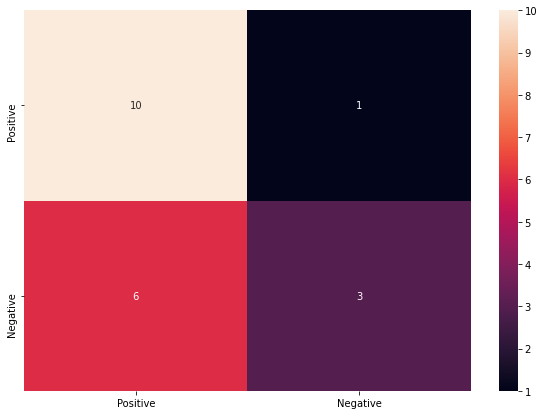

In [17]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['Positive', 'Negative']],
                  columns = [i for i in ['Positive', 'Negative']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [18]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
data_features = vectorizer.fit_transform(review_df['Reviews'])

data_features = data_features.toarray()

data_features.shape

StatementMeta(Hackathon, 4, 18, Finished, Available)

(65, 652)

In [19]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forestModel = RandomForestClassifier(n_estimators=10, n_jobs=4)

forestModel = forestModel.fit(X_train, y_train)

print(forestModel)

print(np.mean(cross_val_score(forestModel, X, y, cv=10)))

StatementMeta(Hackathon, 4, 19, Finished, Available)

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7357142857142858


In [20]:
result = forestModel.predict(X_test)

StatementMeta(Hackathon, 4, 20, Finished, Available)

### Topic Modeling.
- Clustering reviews into topics.

In [21]:
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
#import pyLDAvis.gensim
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
warnings.simplefilter('ignore')
from itertools import chain

StatementMeta(Hackathon, 4, 21, Finished, Available)

[nltk_data] Downloading package stopwords to /home/trusted-service-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/trusted-service-
[nltk_data]     user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
review_df1 = pd.DataFrame()
review_df1['Reviews_clean'] = review_df.apply(lambda row: nltk.word_tokenize(row['Reviews']), axis=1) # Tokenization of data
review_df1
dictionary = corpora.Dictionary(review_df1['Reviews_clean'])
print(dictionary.num_nnz)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in review_df1['Reviews_clean']]
print(len(doc_term_matrix))

StatementMeta(Hackathon, 4, 22, Finished, Available)

1226
65


In [23]:
#LDA modeling
lda = gensim.models.ldamodel.LdaModel
%time ldamodel = lda(doc_term_matrix,num_topics=8,id2word=dictionary,passes=50,minimum_probability=0)

StatementMeta(Hackathon, 4, 23, Finished, Available)

CPU times: user 1.53 s, sys: 0 ns, total: 1.53 s
Wall time: 1.53 s


In [24]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in ldamodel.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

StatementMeta(Hackathon, 4, 24, Finished, Available)

Topic: 0 
Words: 0.040*"azure" + 0.018*"like" + 0.015*"price" + 0.015*"microsoft" + 0.015*"feature" + 0.015*"regions" + 0.015*"cloud" + 0.011*"cost" + 0.011*"sync" + 0.011*"platform"


Topic: 1 
Words: 0.033*"azure" + 0.022*"use" + 0.020*"not" + 0.020*"platform" + 0.020*"cloud" + 0.019*"really" + 0.017*"support" + 0.017*"price" + 0.015*"provide" + 0.015*"also"


Topic: 2 
Words: 0.045*"cloud" + 0.041*"microsoft" + 0.029*"azure" + 0.023*"host" + 0.023*"use" + 0.019*"not" + 0.015*"service" + 0.015*"compute" + 0.012*"get" + 0.012*"scale"


Topic: 3 
Words: 0.036*"azure" + 0.016*"get" + 0.016*"percent" + 0.012*"microsoft" + 0.012*"offer" + 0.012*"support" + 0.012*"resource" + 0.012*"delete" + 0.012*"issue" + 0.008*"cloud"


Topic: 4 
Words: 0.044*"azure" + 0.017*"cloud" + 0.017*"not" + 0.014*"best" + 0.010*"go" + 0.010*"platform" + 0.010*"get" + 0.010*"microsoft" + 0.010*"one" + 0.010*"aws"


Topic: 5 
Words: 0.032*"azure" + 0.027*"platform" + 0.022*"not" + 0.022*"microsoft" + 0.016*"back"